# Data investigation
## Author - gromdimon
## 01.06.2023


## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Locating data

In [2]:
import os
for dirname, _, filenames in os.walk('long_covid2'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


long_covid2/twitter/long7/data_1439798676474445830.json
long_covid2/twitter/long7/users_1423973486486228992.json
long_covid2/twitter/long7/users_1431500801663541248.json
long_covid2/twitter/long7/users_1457033680266932224.json
long_covid2/twitter/long7/users_1393195106954584068.json
long_covid2/twitter/long7/data_1448217396272115713.json
long_covid2/twitter/long7/data_1449658904405815298.json
long_covid2/twitter/long7/users_1444727584223285248.json
long_covid2/twitter/long7/users_1449860868016152583.json
long_covid2/twitter/long7/data_1446957932311162887.json
long_covid2/twitter/long7/users_1435347682634174471.json
long_covid2/twitter/long7/users_1450372662040072196.json
long_covid2/twitter/long7/users_1448998259293364224.json
long_covid2/twitter/long7/users_1446574332671676429.json
long_covid2/twitter/long7/users_1420096700291633161.json
long_covid2/twitter/long7/data_1400758956952260610.json
long_covid2/twitter/long7/users_1422163618821509122.json
long_covid2/twitter/long7/data_14132

In [3]:
# Stopwords
with open('stopwords-de.txt', 'r') as f:
    stopwords = f.read().splitlines()

if len(stopwords) != len(set(stopwords)):
    print('There are duplicates in the stopwords list')
else:
    print('There are no duplicates in the stopwords list')

print('Number of stopwords: ', len(stopwords))

stopwords = [word.lower() for word in stopwords]

There are no duplicates in the stopwords list
Number of stopwords:  620


## Example text analysis

In [4]:
!pip install openpyxl
df = pd.read_excel('long_covid2/event_registry/articles_LC_1.xlsx')
display(df.head())

,Unique ID (URI),URL,Publish date,Publish time,Source URI,Source title,Language,Article title,Article body
0,7469268348,https://www.gmx.at/magazine/gesundheit/histami...,2023-03-28,10:34:00,gmx.at,GMX News,deu,Mastzellaktivierungssyndrom - Was steckt dahin...,Das Mastzellaktivierungssyndrom - kurz MCAS - ...
1,7469260258,https://www.gmx.ch/magazine/gesundheit/histami...,2023-03-28,10:30:00,gmx.ch,GMX News,deu,Mastzellaktivierungssyndrom - Was steckt dahin...,Das Mastzellaktivierungssyndrom - kurz MCAS - ...
2,7469069144,https://www.finanznachrichten.de/nachrichten-2...,2023-03-28,08:38:00,finanznachrichten.de,FinanzNachrichten.de,deu,12 Nominierte für den größten deutschen Medien...,Berlin (ots) - 12 potenzielle Gewinnerinnen un...
3,7468754872,https://www.augsburger-allgemeine.de/mindelhei...,2023-03-28,04:44:00,augsburger-allgemeine.de,Augsburger Allgemeine,deu,Durch Long-Covid entdeckte Ingo Pelzer sein Ta...,Die Folgen einer Corona-Erkrankung werfen Ingo...
4,7468716366,https://m.noen.at/horn/im-gespraech-wird-schwi...,2023-03-28,04:08:00,m.noen.at,m.noen.at,deu,"""Wird schwierig, sind aber auf gutem Weg""",NÖN: Die Kritik an der Übereinkunft zwischen Ö...


### Small EDA

In [5]:
def check_missing_values_and_duplicates(dataframe):
    if dataframe.isnull().sum().sum() > 0 or dataframe.isnull().sum().sum() > 0:
        m_total = dataframe.isnull().sum().sort_values(ascending=False)
        total = m_total[m_total > 0]

        m_percent = dataframe.isnull().mean().sort_values(ascending=False)
        percent = m_percent[m_percent > 0]

        m_duplicates = dataframe.duplicated().sort_values(ascending=False)
        duplicates = m_duplicates[m_duplicates > 0]

        missing_data = pd.concat([total, percent, duplicates], axis=1, keys=['Total', 'Percent', 'Duplicates'])

        print(f'Total and Percentage of NaN & Duplicates:\n {missing_data}')
    else:
        print('No NaN or Duplicate found.')

In [6]:
check_missing_values_and_duplicates(df)

No NaN or Duplicate found.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unique ID (URI)  662 non-null    int64 
 1   URL              662 non-null    object
 2   Publish date     662 non-null    object
 3   Publish time     662 non-null    object
 4   Source URI       662 non-null    object
 5   Source title     662 non-null    object
 6   Language         662 non-null    object
 7   Article title    662 non-null    object
 8   Article body     662 non-null    object
dtypes: int64(1), object(8)
memory usage: 46.7+ KB


In [8]:
df['publish_date'] = pd.to_datetime(df['Publish date'])
df['publish_time'] = pd.to_datetime(df['Publish date'] + ' ' + df['Publish time'])
display(df.head(2))

,Unique ID (URI),URL,Publish date,Publish time,Source URI,Source title,Language,Article title,Article body,publish_date,publish_time
0,7469268348,https://www.gmx.at/magazine/gesundheit/histami...,2023-03-28,10:34:00,gmx.at,GMX News,deu,Mastzellaktivierungssyndrom - Was steckt dahin...,Das Mastzellaktivierungssyndrom - kurz MCAS - ...,2023-03-28,2023-03-28 10:34:00
1,7469260258,https://www.gmx.ch/magazine/gesundheit/histami...,2023-03-28,10:30:00,gmx.ch,GMX News,deu,Mastzellaktivierungssyndrom - Was steckt dahin...,Das Mastzellaktivierungssyndrom - kurz MCAS - ...,2023-03-28,2023-03-28 10:30:00


In [9]:
# df.drop(['Publish date', 'Publish time'], axis=1, inplace=True)
display(df.head(3))

,Unique ID (URI),URL,Publish date,Publish time,Source URI,Source title,Language,Article title,Article body,publish_date,publish_time
0,7469268348,https://www.gmx.at/magazine/gesundheit/histami...,2023-03-28,10:34:00,gmx.at,GMX News,deu,Mastzellaktivierungssyndrom - Was steckt dahin...,Das Mastzellaktivierungssyndrom - kurz MCAS - ...,2023-03-28,2023-03-28 10:34:00
1,7469260258,https://www.gmx.ch/magazine/gesundheit/histami...,2023-03-28,10:30:00,gmx.ch,GMX News,deu,Mastzellaktivierungssyndrom - Was steckt dahin...,Das Mastzellaktivierungssyndrom - kurz MCAS - ...,2023-03-28,2023-03-28 10:30:00
2,7469069144,https://www.finanznachrichten.de/nachrichten-2...,2023-03-28,08:38:00,finanznachrichten.de,FinanzNachrichten.de,deu,12 Nominierte für den größten deutschen Medien...,Berlin (ots) - 12 potenzielle Gewinnerinnen un...,2023-03-28,2023-03-28 08:38:00


In [34]:
# See values throwout the columns
# Source URI
print('Source URI:')
display(df['Source URI'].value_counts())

# Language
print('Language:')
display(df['Language'].value_counts())

Source URI:


finanznachrichten.de    19
sueddeutsche.de         16
tz.de                   14
merkur.de               14
kreiszeitung.de         14
                        ..
luzernerzeitung.ch       1
usanews-24.com           1
radio-plassenburg.de     1
news.de                  1
nw.de                    1
Name: Source URI, Length: 184, dtype: int64

Language:


deu    662
Name: Language, dtype: int64

In [36]:
# Calculate min, max and average length of the articles
df['text_length'] = df['Article body'].apply(lambda x: len(x))
print('Min length: ', df['text_length'].min())
print('Max length: ', df['text_length'].max())
print('Average length: ', df['text_length'].mean())

Min length:  279
Max length:  303
Average length:  295.52416918429003


In [38]:
# Datetime columns
print('Publish date:')
print(df['publish_date'].describe(datetime_is_numeric=True))
print(df['publish_date'].min())
print(df['publish_date'].max())

print('Publish time:')
print(df['publish_time'].describe(datetime_is_numeric=True))
print(df['publish_time'].min())
print(df['publish_time'].max())


Publish date:
count                              662
mean     2023-03-12 13:07:25.921450240
min                2023-02-25 00:00:00
25%                2023-03-04 00:00:00
50%                2023-03-14 00:00:00
75%                2023-03-20 00:00:00
max                2023-03-28 00:00:00
Name: publish_date, dtype: object
2023-02-25 00:00:00
2023-03-28 00:00:00
Publish time:
count                              662
mean     2023-03-13 00:35:26.646525696
min                2023-02-25 04:21:00
25%                2023-03-04 10:55:15
50%                2023-03-14 04:36:00
75%                2023-03-20 09:20:30
max                2023-03-28 10:34:00
Name: publish_time, dtype: object
2023-02-25 04:21:00
2023-03-28 10:34:00


Histogram of publish_time


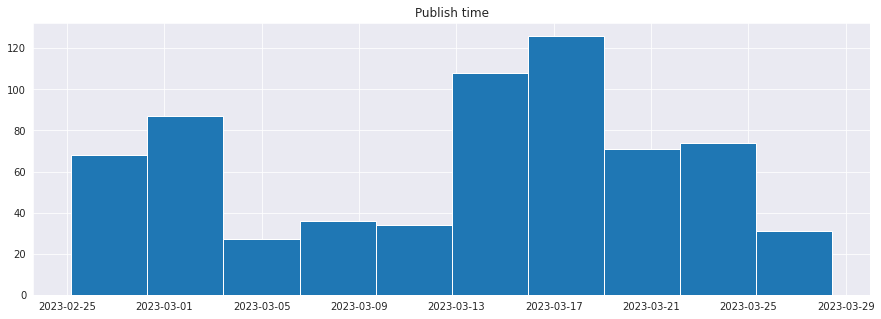

Plot of publish_time and text_length


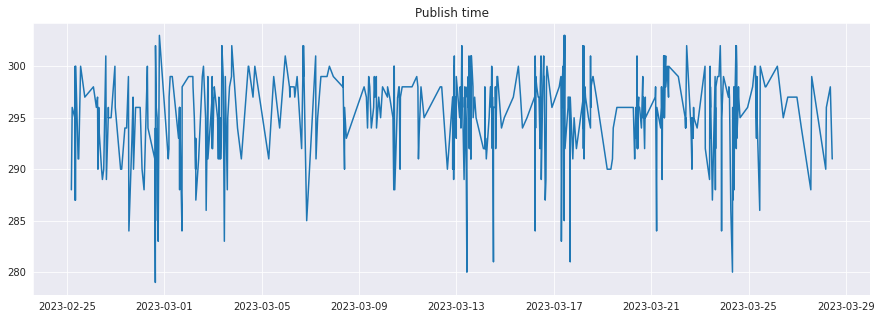

In [41]:
# Plotting the datetime publish_time
print('Histogram of publish_time')
plt.figure(figsize=(15, 5))
plt.title('Publish time')
plt.hist(df['publish_time'], bins=10)
plt.show()

print('Plot of publish_time and text_length')
plt.figure(figsize=(15, 5))
plt.title('Publish time')
plt.plot(df['publish_time'], df['text_length'])
plt.show()

In [42]:
# Investigating the text
# Calculate the number of occurrences of words from stopwords in the Article body
df['stopwords_count'] = df['Article body'].apply(lambda x: len([word for word in x.split() if word.lower() in stopwords]))
print('Min stopwords count: ', df['stopwords_count'].min())
print('Max stopwords count: ', df['stopwords_count'].max())
print('Average stopwords count: ', df['stopwords_count'].mean())
display(df.head(3))

Min stopwords count:  6
Max stopwords count:  32
Average stopwords count:  19.400302114803626


,Unique ID (URI),URL,Source URI,Source title,Language,Article title,Article body,publish_date,publish_time,text_length,stopwords_count
0,7469268348,https://www.gmx.at/magazine/gesundheit/histami...,gmx.at,GMX News,deu,Mastzellaktivierungssyndrom - Was steckt dahin...,Das Mastzellaktivierungssyndrom - kurz MCAS - ...,2023-03-28,2023-03-28 10:34:00,291,19
1,7469260258,https://www.gmx.ch/magazine/gesundheit/histami...,gmx.ch,GMX News,deu,Mastzellaktivierungssyndrom - Was steckt dahin...,Das Mastzellaktivierungssyndrom - kurz MCAS - ...,2023-03-28,2023-03-28 10:30:00,291,19
2,7469069144,https://www.finanznachrichten.de/nachrichten-2...,finanznachrichten.de,FinanzNachrichten.de,deu,12 Nominierte für den größten deutschen Medien...,Berlin (ots) - 12 potenzielle Gewinnerinnen un...,2023-03-28,2023-03-28 08:38:00,298,11


Histogram of stopwords_count


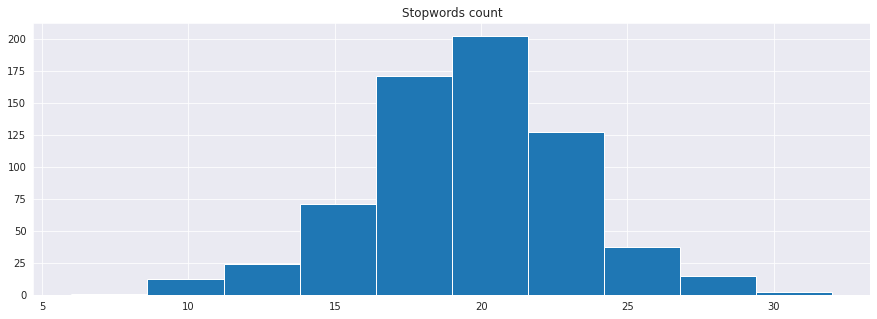

Plot of stopwords_count and text_length


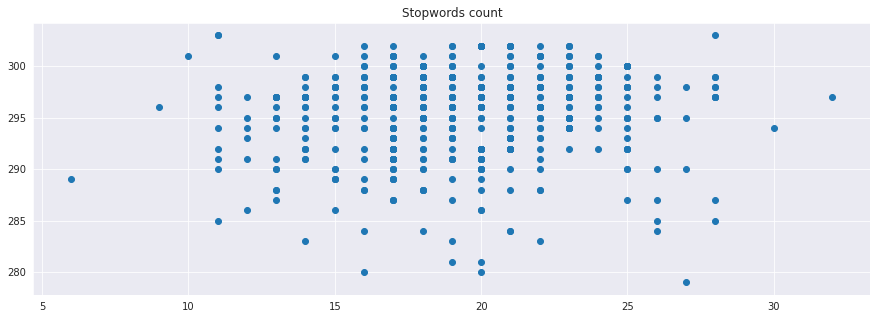

In [44]:
# Plotting the stopwords_count
print('Histogram of stopwords_count')
plt.figure(figsize=(15, 5))
plt.title('Stopwords count')
plt.hist(df['stopwords_count'], bins=10)
plt.show()

print('Plot of stopwords_count and text_length')
plt.figure(figsize=(15, 5))
plt.title('Stopwords count')
plt.plot(df['stopwords_count'], df['text_length'], 'o')
plt.show()

In [45]:
df.head(2)

,Unique ID (URI),URL,Source URI,Source title,Language,Article title,Article body,publish_date,publish_time,text_length,stopwords_count
0,7469268348,https://www.gmx.at/magazine/gesundheit/histami...,gmx.at,GMX News,deu,Mastzellaktivierungssyndrom - Was steckt dahin...,Das Mastzellaktivierungssyndrom - kurz MCAS - ...,2023-03-28,2023-03-28 10:34:00,291,19
1,7469260258,https://www.gmx.ch/magazine/gesundheit/histami...,gmx.ch,GMX News,deu,Mastzellaktivierungssyndrom - Was steckt dahin...,Das Mastzellaktivierungssyndrom - kurz MCAS - ...,2023-03-28,2023-03-28 10:30:00,291,19


### Results
After the small EDA we can see that:
- There are 11 columns totally
- Meaningfully columns are: 'URL', 'Article title', 'Article body', 'publish_time', 'text_length', 'stopwords_count'
- All the articles are in german (so Language column is redundant)
- The articles are published from 2023-02 to 2023-03
- There are 184 sources of the articles, some of them combine several articles (finanznachrichten.de)
- The average length of the articles is about 300 symbols
- The average number of stopwords in the articles is about 20
- The number of stopwords in the articles is not correlated with the length of the articles and moreover has a pretty distribution

## Example covid report analysis

In [63]:
df_report = pd.read_excel('long_covid2/brand24/long-covid_report_2023-03-30_15.55.xlsx', header=1)
display(df_report.head())

,Unnamed: 0,ID,Date,Hrs,Title,Content,Source,Domain,Category,Sentiment,Tags
0,NaN,69471821207,2023-03-30,06:38,NaN,NaN,Tweet-ID: 1641434640073228289,twitter.com,Twitter,0.0,NaN
1,NaN,69471461501,2023-03-30,06:36,NaN,NaN,Tweet-ID: 1641434159108489219,twitter.com,Twitter,0.0,NaN
2,NaN,69471821215,2023-03-30,06:32,NaN,NaN,Tweet-ID: 1641433328711766017,twitter.com,Twitter,0.0,NaN
3,NaN,69471821220,2023-03-30,06:27,NaN,NaN,Tweet-ID: 1641431903831216128,twitter.com,Twitter,-1.0,NaN
4,NaN,69471821228,2023-03-30,06:13,NaN,NaN,Tweet-ID: 1641428508436996096,twitter.com,Twitter,0.0,NaN


### EDA

In [64]:
check_missing_values_and_duplicates(df_report)

Total and Percentage of NaN & Duplicates:
             Total   Percent Duplicates
Unnamed: 0  11074  1.000000        NaN
Tags        11074  1.000000        NaN
Title        6176  0.557703        NaN
Content      6176  0.557703        NaN
Source        297  0.026820        NaN
Sentiment      26  0.002348        NaN


In [65]:
df_report.drop(['Unnamed: 0', 'Tags'], axis=1, inplace=True)
display(df_report.head())

,ID,Date,Hrs,Title,Content,Source,Domain,Category,Sentiment
0,69471821207,2023-03-30,06:38,NaN,NaN,Tweet-ID: 1641434640073228289,twitter.com,Twitter,0.0
1,69471461501,2023-03-30,06:36,NaN,NaN,Tweet-ID: 1641434159108489219,twitter.com,Twitter,0.0
2,69471821215,2023-03-30,06:32,NaN,NaN,Tweet-ID: 1641433328711766017,twitter.com,Twitter,0.0
3,69471821220,2023-03-30,06:27,NaN,NaN,Tweet-ID: 1641431903831216128,twitter.com,Twitter,-1.0
4,69471821228,2023-03-30,06:13,NaN,NaN,Tweet-ID: 1641428508436996096,twitter.com,Twitter,0.0


In [66]:
df_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11074 entries, 0 to 11073
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         11074 non-null  int64  
 1   Date       11074 non-null  object 
 2   Hrs        11074 non-null  object 
 3   Title      4898 non-null   object 
 4   Content    4898 non-null   object 
 5   Source     10777 non-null  object 
 6   Domain     11074 non-null  object 
 7   Category   11074 non-null  object 
 8   Sentiment  11048 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 778.8+ KB


In [69]:
df_report['publish_time'] = pd.to_datetime(df_report['Date'] + ' ' + df_report['Hrs'])
display(df_report.head(3))

,ID,Date,Hrs,Title,Content,Source,Domain,Category,Sentiment,publish_date
0,69471821207,2023-03-30,06:38,NaN,NaN,Tweet-ID: 1641434640073228289,twitter.com,Twitter,0.0,2023-03-30 06:38:00
1,69471461501,2023-03-30,06:36,NaN,NaN,Tweet-ID: 1641434159108489219,twitter.com,Twitter,0.0,2023-03-30 06:36:00
2,69471821215,2023-03-30,06:32,NaN,NaN,Tweet-ID: 1641433328711766017,twitter.com,Twitter,0.0,2023-03-30 06:32:00


In [83]:
# See values throwout the columns
# Domain
print('Domain:')
display(df_report['Domain'].value_counts())

# Category
print('Category:')
display(df_report['Category'].value_counts())

# Sentiment
print('Sentiment:')
display(df_report['Sentiment'].value_counts())

Domain:


ndr.de                   98
ga.de                    88
focus.de                 84
youtube.com              78
spiegel.de               69
                         ..
gruene-linke.de           1
de.wikipedia.org          1
herzkammer.podigee.io     1
envivas.de                1
bo-alternativ.de          1
Name: Domain, Length: 1530, dtype: int64

Category:


News        3038
Web         1127
Blogs        396
Forums       207
Videos        80
Podcasts      42
TikTok         8
Name: Category, dtype: int64

Sentiment:


 0.0    4592
-1.0     234
 1.0      72
Name: Sentiment, dtype: int64

In [74]:
# Assert averages in missing values
check_missing_values_and_duplicates(df_report)

# Content
# Drop rows with missing values
df_report.dropna(subset=['Content'], inplace=True)

# Title
for i in df_report[df_report['Title'].isnull()].index:
    df_report.loc[i, 'Title'] = df_report.loc[i, 'Content'][:50]


# Source
for i in df_report[df_report['Source'].isnull()].index:
    df_report.loc[i, 'Source'] = 'Unknown'

# Sentiment
for i in df_report[df_report['Sentiment'].isnull()].index:
    df_report.loc[i, 'Sentiment'] = 0


display(df_report.head())
check_missing_values_and_duplicates(df_report)

Total and Percentage of NaN & Duplicates:
            Total   Percent Duplicates
Title       6176  0.557703        NaN
Content     6176  0.557703        NaN
Source       297  0.026820        NaN
Sentiment     26  0.002348        NaN


,ID,Date,Hrs,Title,Content,Source,Domain,Category,Sentiment,publish_date
11,69470691892,2023-03-30,05:32,Entlarvender Bericht: Meldung zu aufwändig – Ä...,Entlarvender Bericht: Meldung zu aufwändig – Ä...,https://diesituation.wordpress.com/2023/03/30/...,diesituation.wordpress.com,Blogs,0.0,2023-03-30 05:32:00
32,69468248231,2023-03-30,01:44,Wann kommen Medikamente gegen Long Covid?,"Aber was ist mit Therapien für Menschen, die n...",https://www.shz.de/lebenswelten/gesundheit-fit...,shz.de,News,0.0,2023-03-30 01:44:00
33,69468902109,2023-03-30,01:40,Spiel auf Zeit: Wann kommen Medikamente gegen ...,"Aber was ist mit Therapien für Menschen, die n...",https://www.ksta.de/ratgeber/dpa-ratgeber/wann...,ksta.de,News,0.0,2023-03-30 01:40:00
34,69468902105,2023-03-30,01:27,„Spiel auf Zeit“: Was den Kampf gegen Long Cov...,"Aber was ist mit Therapien für Menschen, die n...",https://utopia.de/news/spiel-auf-zeit-was-den-...,utopia.de,News,0.0,2023-03-30 01:27:00
38,69468248226,2023-03-30,01:06,Wann kommen Medikamente gegen Long Covid?,"Aber was ist mit Therapien für Menschen, die n...",https://newsflash24.audiotakes.de/newsflash24-...,newsflash24.audiotakes.de,Web,0.0,2023-03-30 01:06:00


In [76]:
# Calculate min, max and average length of the articles
df_report['text_length'] = df_report['Content'].apply(lambda x: len(x))
print('Min length: ', df_report['text_length'].min())
print('Max length: ', df_report['text_length'].max())
print('Average length: ', df_report['text_length'].mean())

Min length:  1
Max length:  254
Average length:  218.13413638219683


In [78]:
# Datetime column
print('Publish time:')
print(df['publish_time'].describe(datetime_is_numeric=True))
print(df['publish_time'].min())
print(df['publish_time'].max())

Publish time:
count                              662
mean     2023-03-13 00:35:26.646525696
min                2023-02-25 04:21:00
25%                2023-03-04 10:55:15
50%                2023-03-14 04:36:00
75%                2023-03-20 09:20:30
max                2023-03-28 10:34:00
Name: publish_time, dtype: object
2023-02-25 04:21:00
2023-03-28 10:34:00


Histogram of publish_time


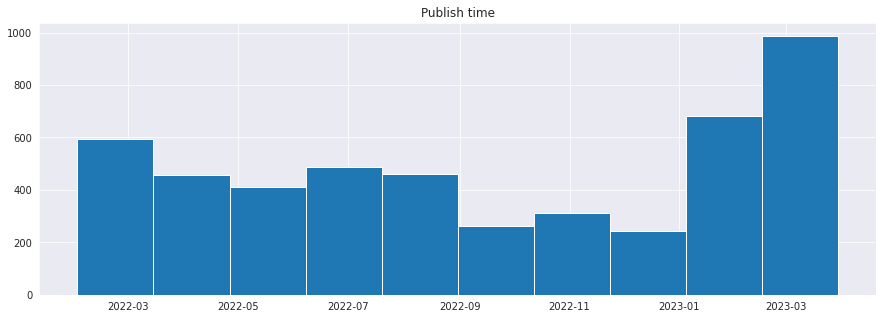

Plot of publish_time and text_length


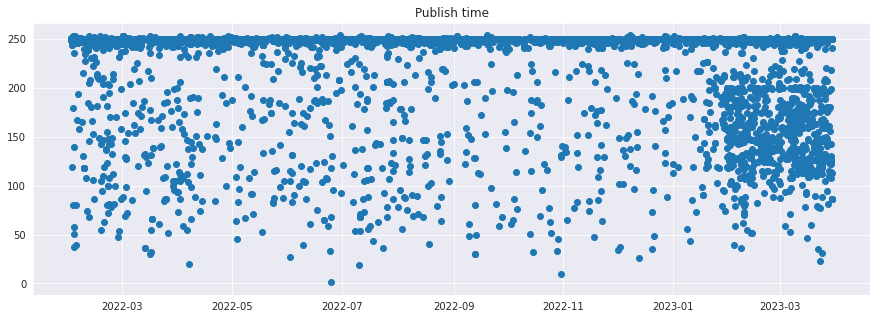

In [80]:
# Plotting the datetime publish_time
print('Histogram of publish_time')
plt.figure(figsize=(15, 5))
plt.title('Publish time')
plt.hist(df_report['publish_time'], bins=10)
plt.show()

print('Plot of publish_time and text_length')
plt.figure(figsize=(15, 5))
plt.title('Publish time')
plt.plot(df_report['publish_time'], df_report['text_length'], 'o')
plt.show()

In [81]:
# Investigating the text
# Calculate the number of occurrences of words from stopwords in the Article body
df_report['stopwords_count'] = df_report['Content'].apply(lambda x: len([word for word in x.split() if word.lower() in stopwords]))
print('Min stopwords count: ', df_report['stopwords_count'].min())
print('Max stopwords count: ', df_report['stopwords_count'].max())
print('Average stopwords count: ', df_report['stopwords_count'].mean())
display(df_report.head(3))

Min stopwords count:  0
Max stopwords count:  33
Average stopwords count:  12.093507554103716


,ID,Date,Hrs,Title,Content,Source,Domain,Category,Sentiment,publish_time,text_length,stopwords_count
11,69470691892,2023-03-30,05:32,Entlarvender Bericht: Meldung zu aufwändig – Ä...,Entlarvender Bericht: Meldung zu aufwändig – Ä...,https://diesituation.wordpress.com/2023/03/30/...,diesituation.wordpress.com,Blogs,0.0,2023-03-30 05:32:00,241,3
32,69468248231,2023-03-30,01:44,Wann kommen Medikamente gegen Long Covid?,"Aber was ist mit Therapien für Menschen, die n...",https://www.shz.de/lebenswelten/gesundheit-fit...,shz.de,News,0.0,2023-03-30 01:44:00,86,8
33,69468902109,2023-03-30,01:40,Spiel auf Zeit: Wann kommen Medikamente gegen ...,"Aber was ist mit Therapien für Menschen, die n...",https://www.ksta.de/ratgeber/dpa-ratgeber/wann...,ksta.de,News,0.0,2023-03-30 01:40:00,250,16


Histogram of stopwords_count


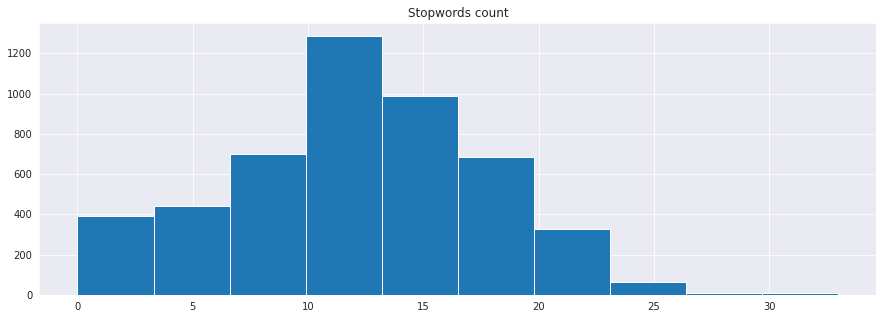

Plot of stopwords_count and text_length


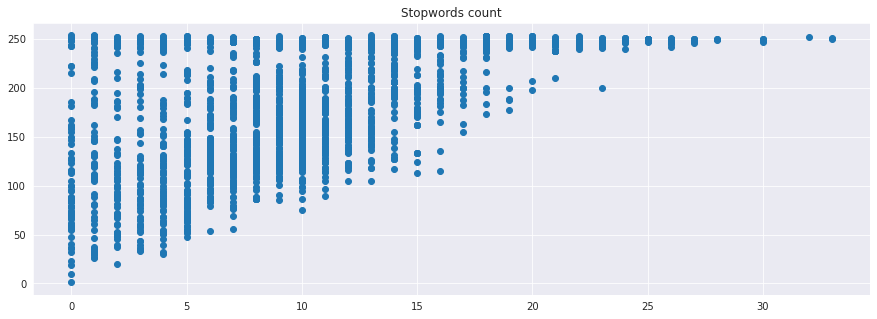

In [82]:
# Plotting the stopwords_count
print('Histogram of stopwords_count')
plt.figure(figsize=(15, 5))
plt.title('Stopwords count')
plt.hist(df_report['stopwords_count'], bins=10)
plt.show()

print('Plot of stopwords_count and text_length')
plt.figure(figsize=(15, 5))
plt.title('Stopwords count')
plt.plot(df_report['stopwords_count'], df_report['text_length'], 'o')
plt.show()

### Results for the report
After the small EDA we can see that:
- There are 11 columns totally
- Meaningfully columns are: 'Title', 'Content', 'Source', 'Domain', 'Category', 'Sentiment', 'publish_time', 'text_length', 'stopwords_count'
- The articles are published from 2023-02 to 2023-03
- There are 1530 sources of the articles, some of them combine several articles (ndr.de)
- The average length of the articles is about 250 symbols
- The average number of stopwords in the articles is about 10

## Example tweets analysis

In [ ]:
# TODO: add tweets analysis